# **URBAN SOCIAL CRIME CLASSIFICATION AND VISUALIZATION**

# **SUBMITTED BY:**
# SIDDHARTH THAKUR - 20BCE1144
# PRAKUL VYAS - 20BCE1273
# PPT LINK : https://www.canva.com/design/DAFawYd2-4M/U7I_coBk3OtTah8ca6H7Fg/edit?utm_content=DAFawYd2-4M&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
data_frame = pd.read_csv("crime_data.csv")

In [ ]:
data_frame.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


# Data Wrangling

In [ ]:
data_frame = data_frame.drop(['Unnamed: 0'], axis=1)
data_frame = data_frame.drop(['ID'], axis=1)
data_frame = data_frame.drop(['Case Number'], axis=1) 
data_frame = data_frame.drop(['Date'], axis=1) 
data_frame = data_frame.drop(['Updated On'], axis=1) 

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134900 entries, 0 to 134899
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 134900 non-null  object 
 1   IUCR                  134900 non-null  object 
 2   Primary Type          134900 non-null  object 
 3   Description           134900 non-null  object 
 4   Location Description  134777 non-null  object 
 5   Arrest                134900 non-null  bool   
 6   Domestic              134900 non-null  bool   
 7   Beat                  134900 non-null  int64  
 8   District              134900 non-null  int64  
 9   Ward                  134899 non-null  float64
 10  Community Area        134900 non-null  int64  
 11  FBI Code              134900 non-null  object 
 12  X Coordinate          132995 non-null  float64
 13  Y Coordinate          132995 non-null  float64
 14  Year                  134900 non-null  int64  
 15  

In [ ]:
# Convert Categorical Attributes to Numerical
data_frame['Block'] = pd.factorize(data_frame["Block"])[0]
data_frame['IUCR'] = pd.factorize(data_frame["IUCR"])[0]
data_frame['Description'] = pd.factorize(data_frame["Description"])[0]
data_frame['Location Description'] = pd.factorize(data_frame["Location Description"])[0]
data_frame['FBI Code'] = pd.factorize(data_frame["FBI Code"])[0]
data_frame['Location'] = pd.factorize(data_frame["Location"])[0] 

In [ ]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


In [ ]:
all_classes = data_frame.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
data_frame.loc[data_frame['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'


# **Exploratory Data Analysis**

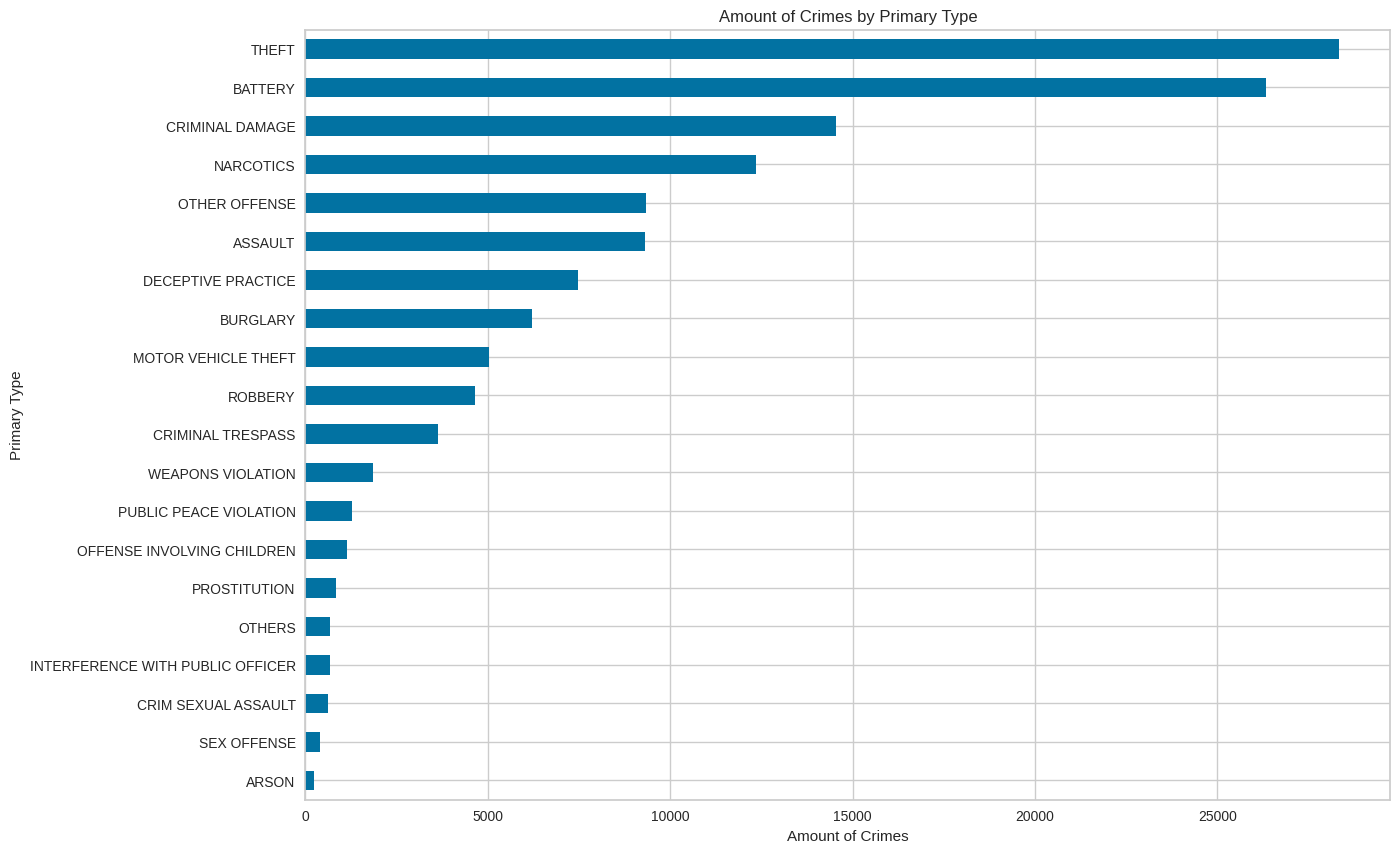

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data_frame.groupby([data_frame['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
all_classes = data_frame.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
3,BURGLARY,6200
9,MOTOR VEHICLE THEFT,5021
16,ROBBERY,4653
6,CRIMINAL TRESPASS,3637
19,WEAPONS VIOLATION,1859
15,PUBLIC PEACE VIOLATION,1272
11,OFFENSE INVOLVING CHILDREN,1143
14,PROSTITUTION,846
13,OTHERS,686
8,INTERFERENCE WITH PUBLIC OFFICER,671


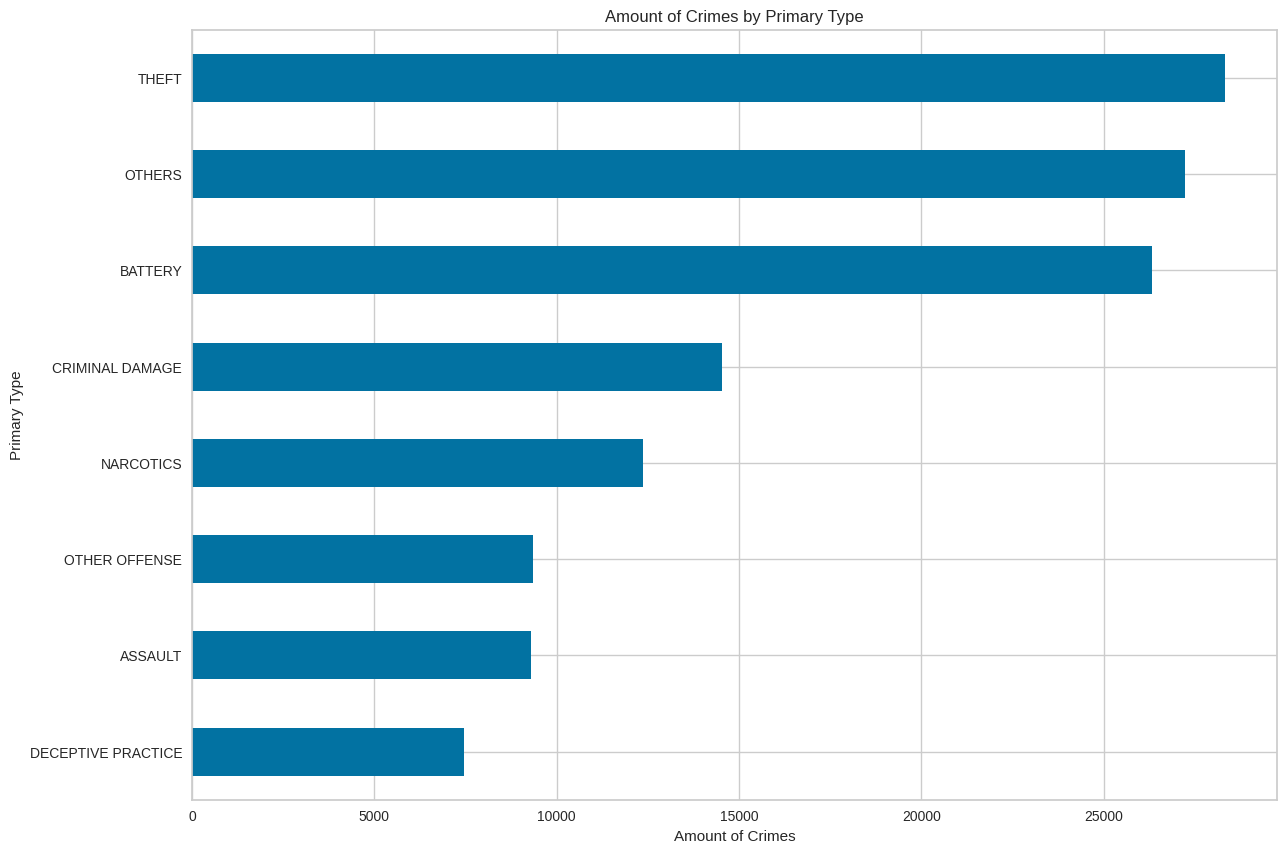

In [ ]:
data_frame.loc[data_frame['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data_frame.groupby([data_frame['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

<Axes: xlabel='count', ylabel='Primary Type'>

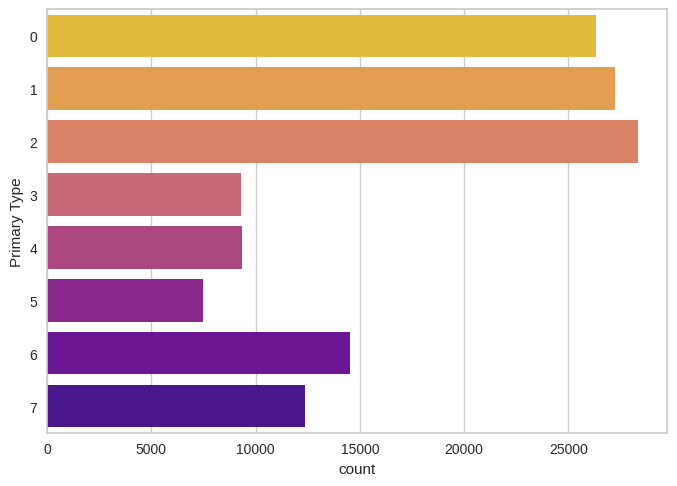

In [ ]:
sns.countplot(y='Primary Type',data=data_frame, palette="plasma_r")

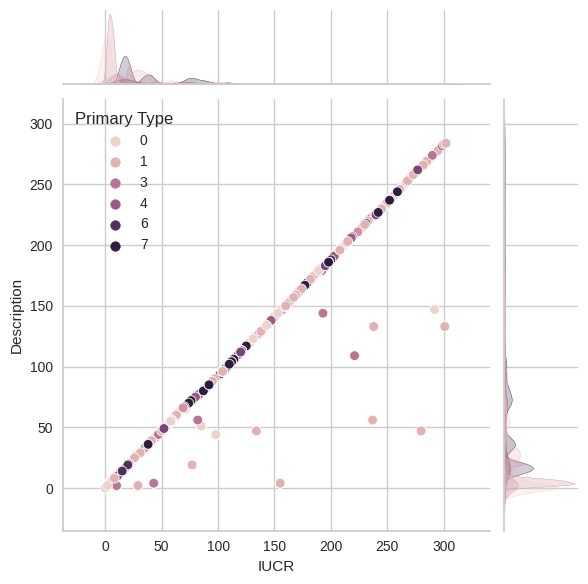

In [ ]:
sns.jointplot(x="IUCR",y="Description",data=data_frame[(data_frame['Community Area']>10) & (data_frame['Community Area']<50)],hue="Primary Type")

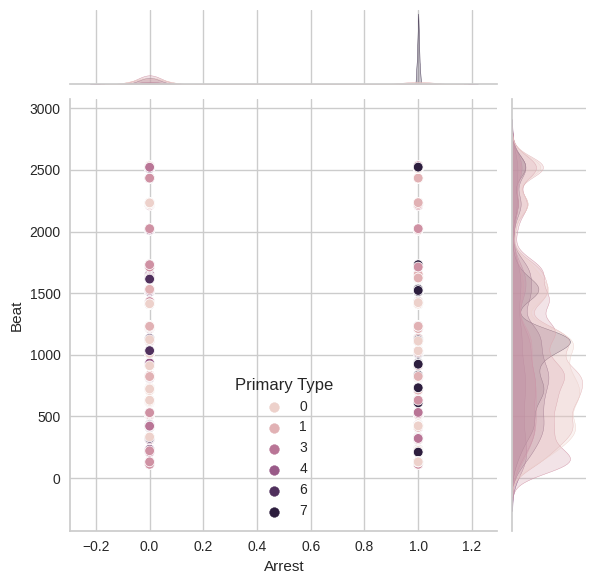

In [ ]:
sns.jointplot(x="Arrest",y="Beat",data=data_frame[(data_frame['Community Area']>10) & (data_frame['Ward']<50)],hue="Primary Type")

<Axes: xlabel='Year', ylabel='Primary Type'>

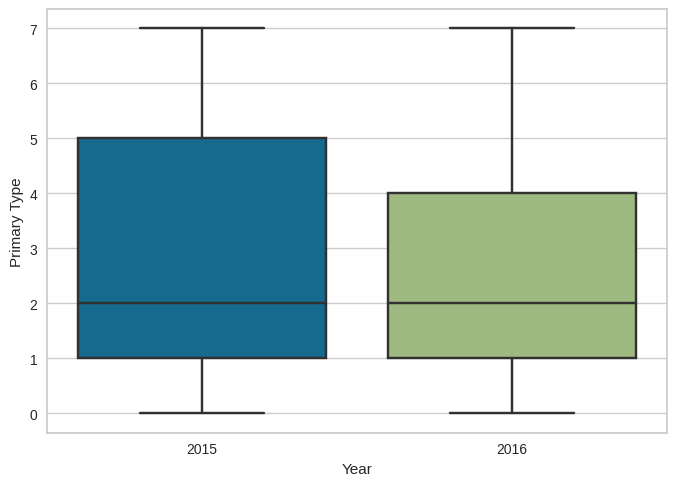

In [ ]:
sns.boxplot(y='Primary Type',x='Year',data=data_frame)

<Axes: xlabel='Community Area', ylabel='Ward'>

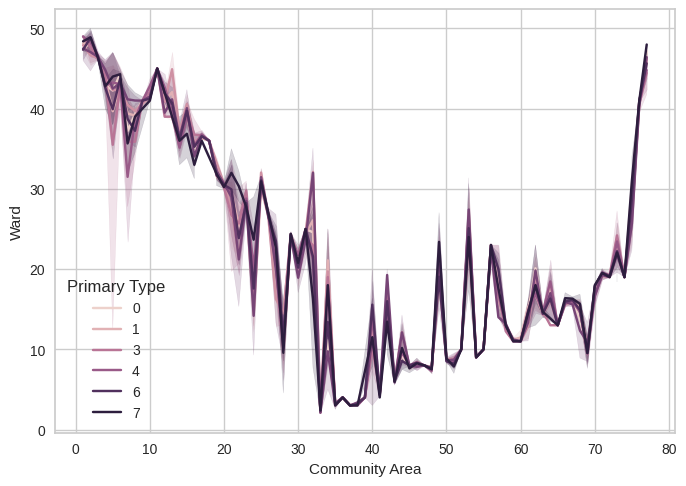

In [ ]:
sns.lineplot(data = data_frame[(data_frame['Year']>2015)], x = "Community Area", y = "Ward",hue="Primary Type")

In [ ]:
Classes = data_frame['Primary Type'].unique()
Classes

array(['BATTERY', 'OTHERS', 'THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'NARCOTICS'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
data_frame['Primary Type'] = pd.factorize(data_frame["Primary Type"])[0] 
data_frame['Primary Type'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
data_frame.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,0,0,0,0,0,True,True,1022,10,24.0,29,0,1154907.0,1893681.0,2016,41.864073,-87.706819,0
1,1,0,0,0,1,False,True,313,3,20.0,42,0,1183066.0,1864330.0,2016,41.782922,-87.604363,1
2,2,1,1,1,2,False,False,1524,15,37.0,25,1,1140789.0,1904819.0,2016,41.894908,-87.758372,2
3,3,2,0,2,3,False,False,1532,15,28.0,25,0,1143223.0,1901475.0,2016,41.885687,-87.749516,3
4,4,3,2,3,1,False,True,1523,15,28.0,25,2,1139890.0,1901675.0,2016,41.886297,-87.761751,4


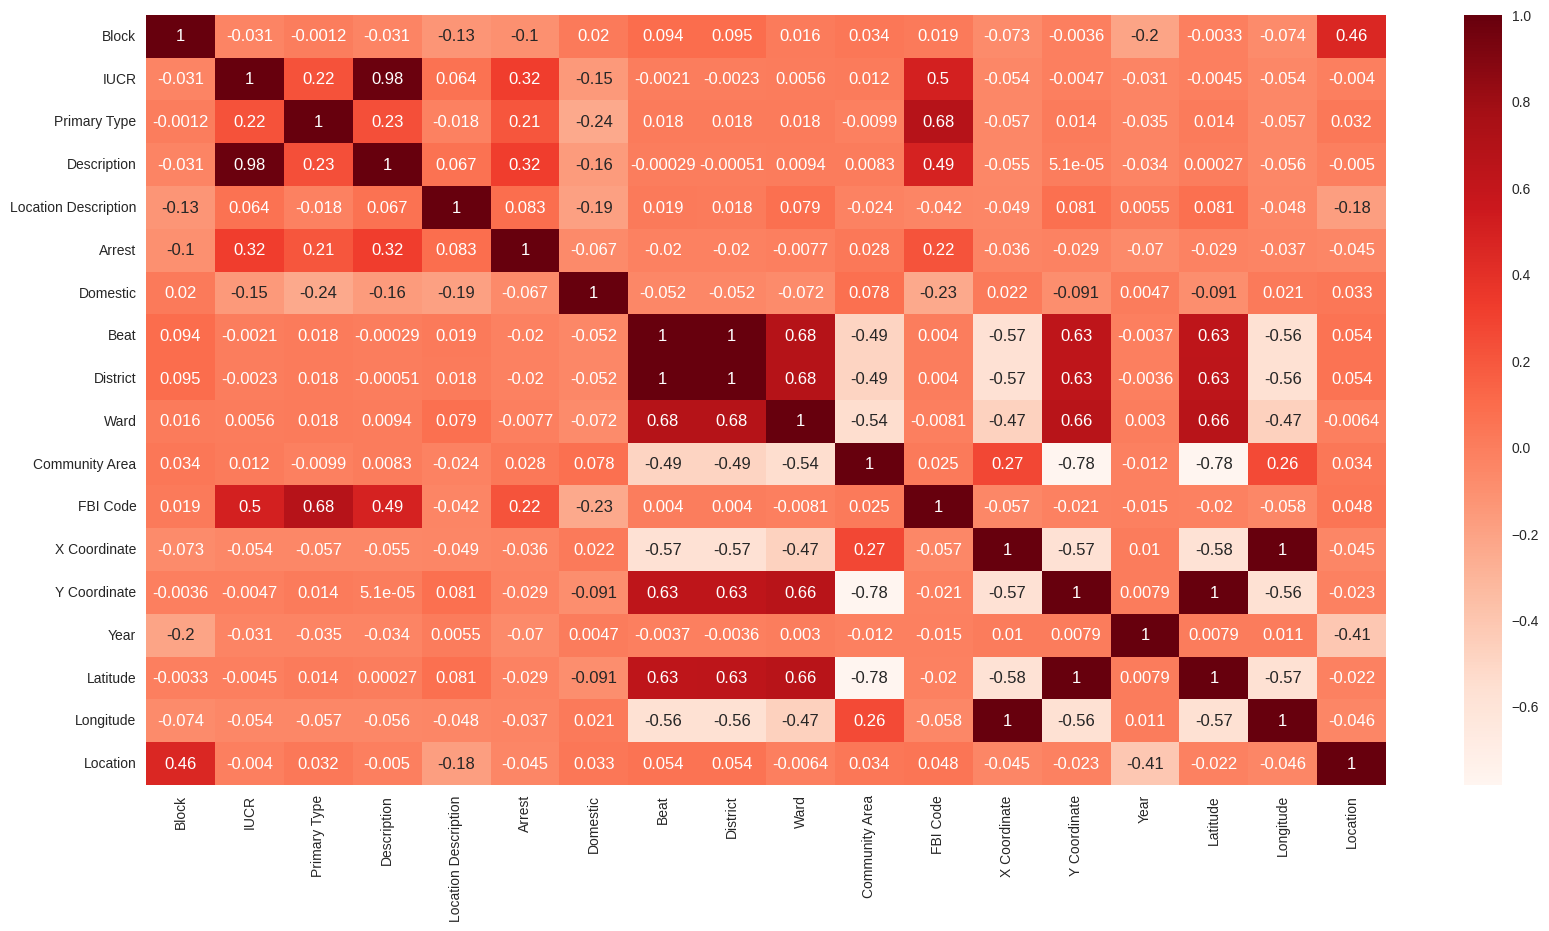

In [ ]:
X_fs = data_frame.drop(['Primary Type'], axis=1)
Y_fs = data_frame['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
data_frame.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134900 entries, 0 to 134899
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 134900 non-null  int64  
 1   IUCR                  134900 non-null  int64  
 2   Primary Type          134900 non-null  int64  
 3   Description           134900 non-null  int64  
 4   Location Description  134900 non-null  int64  
 5   Arrest                134900 non-null  bool   
 6   Domestic              134900 non-null  bool   
 7   Beat                  134900 non-null  int64  
 8   District              134900 non-null  int64  
 9   Ward                  134899 non-null  float64
 10  Community Area        134900 non-null  int64  
 11  FBI Code              134900 non-null  int64  
 12  X Coordinate          132995 non-null  float64
 13  Y Coordinate          132995 non-null  float64
 14  Year                  134900 non-null  int64  
 15  

# **VISUALIZATION MODELS**

# **pca_tsne_visualization**

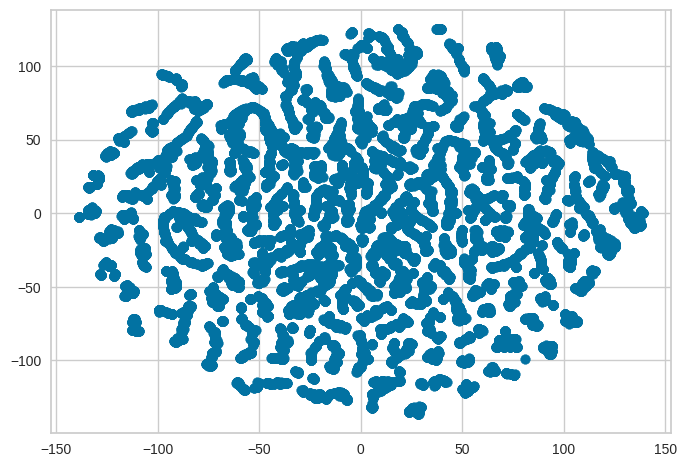

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def pca_tsne_visualization(data, n_pca_components=7, n_tsne_components=2, perplexity=30, n_iter=1000):
    pca = PCA(n_components=n_pca_components)
    pca_transformed_data = pca.fit_transform(data)

    tsne = TSNE(n_components=n_tsne_components, perplexity=perplexity, n_iter=n_iter)
    transformed_data = tsne.fit_transform(pca_transformed_data)

    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.show()

data=data_frame[Features]
pca_tsne_visualization(data)


# **umap_hdbscan_visualization**

In [ ]:
pip install umap-learn


In [ ]:
pip install hdbscan


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


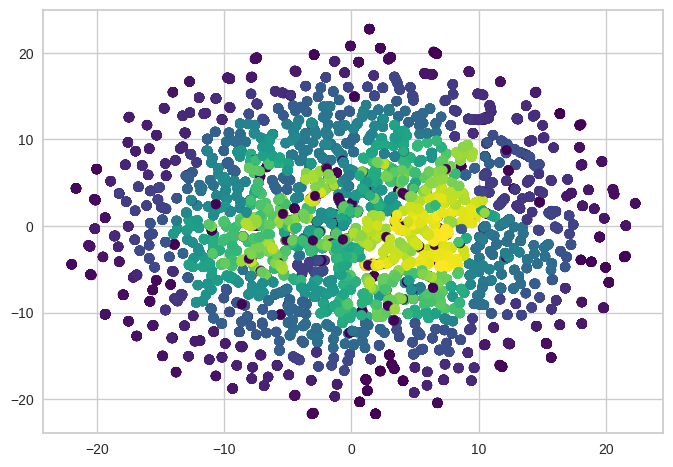

In [ ]:
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt

def umap_hdbscan_visualization(data, n_neighbors=15, min_dist=0.1, n_components=2, min_cluster_size=5):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
    transformed_data = reducer.fit_transform(data)

    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusters = clusterer.fit_predict(transformed_data)

    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=clusters, cmap='viridis')
    plt.show()

data=data_frame[Features]

umap_hdbscan_visualization(data)
